# Depinning phase diagram

Send driven MD on gripd of $(\tau, F)$ points.
Identify undpinned runs with treshold on mobility.
Here $\tau$ is fixed and $F$ increased.

In [14]:
import json
import matplotlib.pyplot as plt
from numpy import array as npa
symbol_list = ['s', 'X', '^', 'o', 'h', 'P']
color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']

## Commensurate case

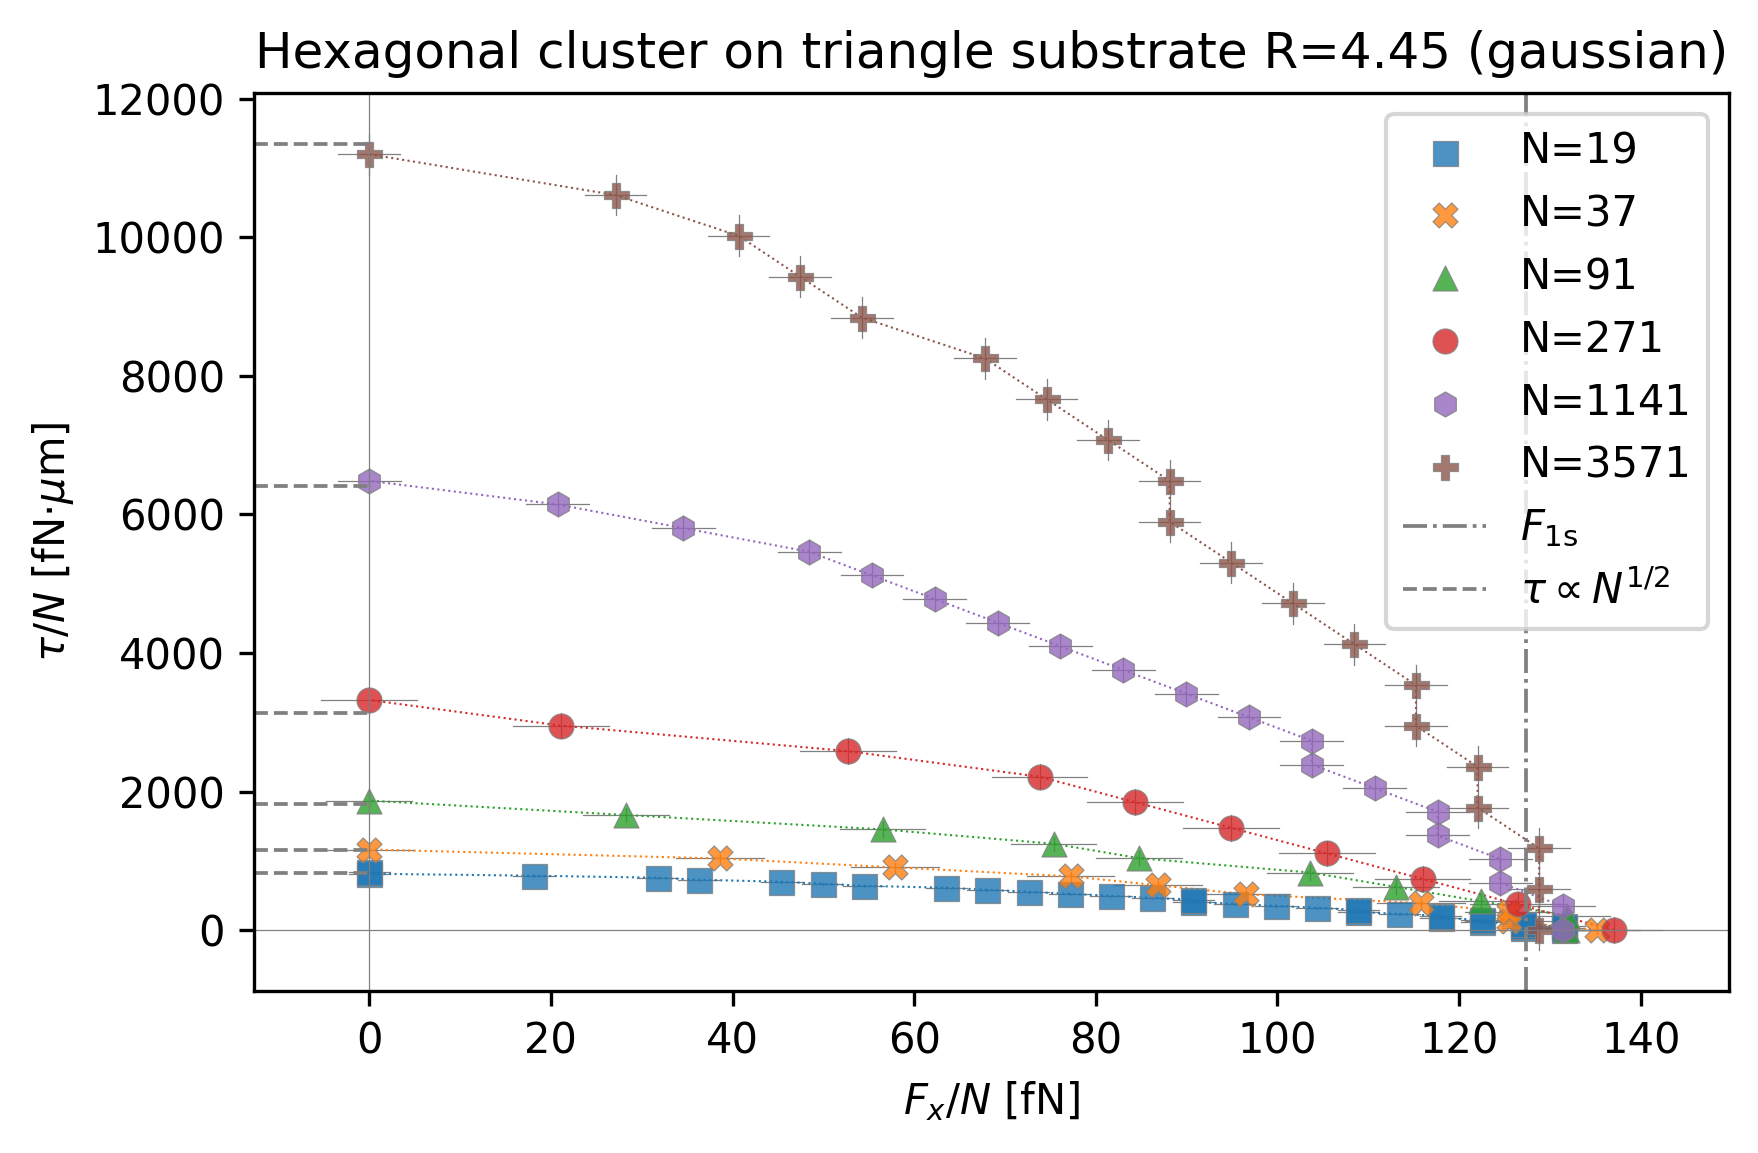

In [42]:
# bdir = 'comm-tanh/'
bdir = 'comm-gauss/'
# bdir = './sq_5.00-gauss/'
i = 0 
N_list = [19, 37, 91, 271, 1141, 3571]
# N_list = [19]
# N_list = [169]
for N in N_list:
    with open(bdir+'info-driver-N_%i.json' % N, 'r') as inj:
        inputs = json.load(inj)              
        
    rmob0, tmob0 = inputs['rmob0'], inputs['tmob0']   
    # Fractions to consider cluster roto/trasl depinned
    rmob_frac, tmob_frac = inputs['rmob_frac'], inputs['tmob_frac']
    Tau_range, F_range = npa(inputs['Tau_range']), npa(inputs['F_range'])
    dTau, dF = Tau_range[1]-Tau_range[0], F_range[1]-F_range[0]
    
    # Load F-Tau simulation grid from analysis
    TF_grid = np.loadtxt(bdir+'TauF_grid-N_%i.npdat' % N)
    mask = TF_grid > 0 # -1=not computed, 0=pinned, 1=roto, dep 2=trasl dep, 3=full dep

    # Plot grid
    ff, tt = np.meshgrid(F_range, Tau_range)  
    sc = plt.scatter(ff[mask].T/N, tt[mask].T/N, 
                     c=color_list[i], marker=symbol_list[i], alpha=0.8, ec='gray', lw=0.3,
                     label='N=%i' % N, zorder=2); 
    plt.plot(ff[mask].T/N, tt[mask].T/N, ':', color=color_list[i], lw=0.5, zorder=1); 
    # Errorbars
    p = np.zeros((len(tt[mask]), 2))
    l = 0
    for f, t in zip(ff[mask].T, tt[mask].T):
            p[l] = f, t
            l+=1
    errbar_pt={'color': 'gray', 'lw': 0.3, 'markersize': 1, 'zorder': 0}
    plt.plot([(p[:,0]-dF/2)/N, (p[:,0]+dF/2)/N], [(p[:,1])/N, (p[:,1])/N], '-', **errbar_pt)
    plt.plot([(p[:,0])/N, (p[:,0])/N], [(p[:,1]-dTau/2)/N, (p[:,1]+dTau/2)/N], '-', **errbar_pt)
    i += 1

# Markings for single colloid static friction force and critical torque scaling
xlim, ylim = plt.xlim(), plt.ylim();
if inputs['MD_inputs']['well_shape'] == 'gaussian': 
    F1s = 127.37 # Gauss sigma=0.6 eps=105
    tau_scalef = 1.9e2 # Gauss
elif inputs['MD_inputs']['well_shape'] == 'tanh': 
    F1s = 232.0266 # Tanh a=0.6 b=2 eps=105
    tau_scalef = 2.55e2 # Tanh
else: F1s = 0
plt.vlines([F1s], *plt.ylim(), label=r'$F_\mathrm{1s}$', lw=0.9, color='gray', ls='-.')
plt.hlines(tau_scalef*np.sqrt(N_list), xlim[0], 0, lw=0.9, color='gray', ls='--')
plt.hlines(0, 0, 0, label=r'$\tau \propto N^{1/2}$', lw=0.9, color='gray', ls='--')
plt.hlines(0, *xlim, lw=0.3, color='gray', ls='-')
plt.vlines(0, *ylim, lw=0.3, color='gray', ls='-')

# Plot comsetic
plt.title("Hexagonal cluster on %s substrate R=%3g (%s)" % (inputs['MD_inputs']['sub_symm'], 
                                                            inputs['MD_inputs']['R'], 
                                                            inputs['MD_inputs']['well_shape']))
# Axis
plt.xlim(*xlim)
plt.ylim(*ylim) 
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel(r'$\tau/N$ [fN$\cdot \mu$m]'); 
plt.xlabel(r'$F_x/N$ [fN]'); 
plt.legend()
# Layout and resolution
plt.tight_layout()
plt.gcf().set_dpi(300)

# Save and plot
plt.savefig(bdir+"dep_diag-combo.pdf")
plt.show()

T 8 F 16
(8, 16)


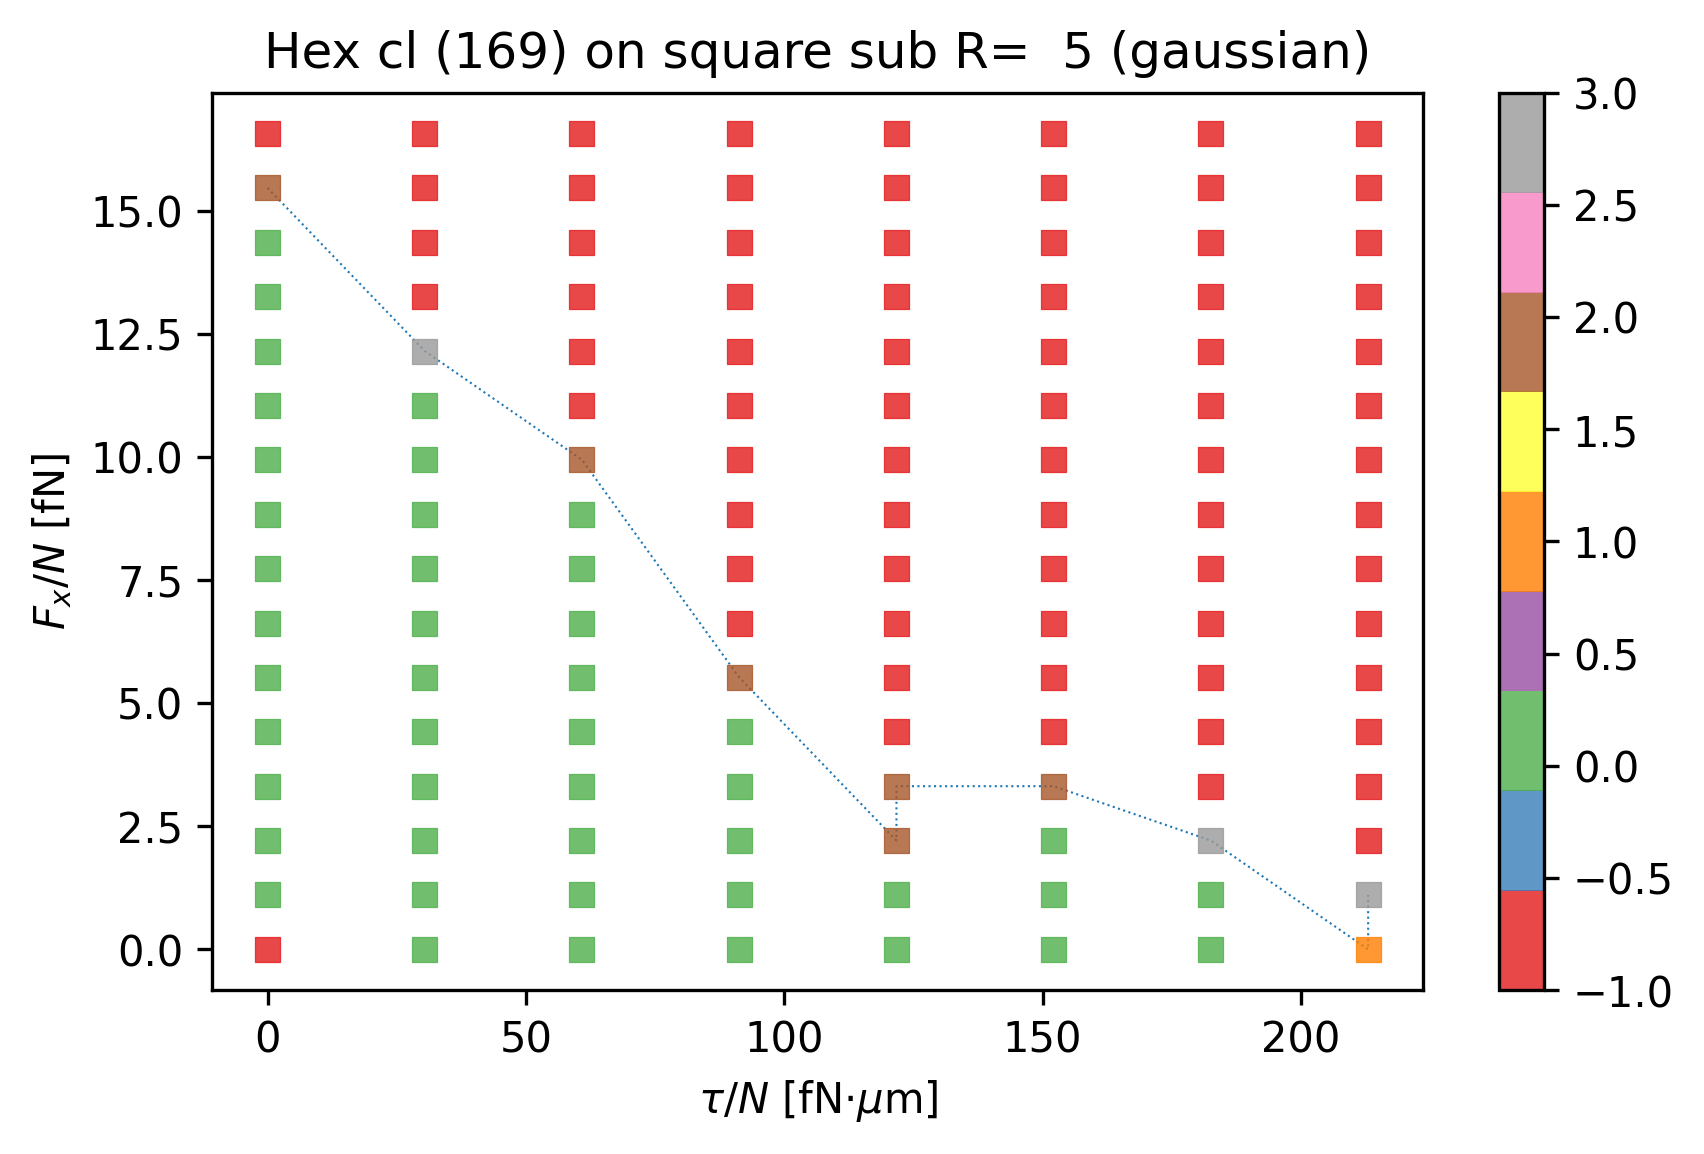

In [70]:
# bdir = './sq_5.00-th_3.4-gauss/'
# bdir = './sq_5.00-tho_-3.4-thd_26.6-gauss/'
# bdir = './comm-gauss/'
bdir = './sq_5.00-tho_-3.4-thd_116.6-gauss/'
i = 0 
# N_list = [19] #, 37, 91, 271, 1141, 3571]
N_list = [169]
for N in N_list:
    with open(bdir+'info-driver-N_%i.json' % N, 'r') as inj:
        inputs = json.load(inj)              
        
    rmob0, tmob0 = inputs['rmob0'], inputs['tmob0']   
    # Fractions to consider cluster roto/trasl depinned
    rmob_frac, tmob_frac = inputs['rmob_frac'], inputs['tmob_frac']
    Tau_range, F_range = npa(inputs['Tau_range']), npa(inputs['F_range'])
    print("T", len(Tau_range), "F", len(F_range))
    # Load F-Tau simulation grid from analysis
    TF_grid = np.loadtxt(bdir+'TauF_grid-N_%i.npdat' % N)
    mask = TF_grid > 0 # -1=not computed, 0=pinned, 1=roto, dep 2=trasl dep, 3=full dep
    
    # Plot grid
    ff, tt = np.meshgrid(F_range, Tau_range)
    print(ff.shape)
#     N = 1
    sc = plt.scatter(tt/N, ff/N, 
                    c=TF_grid, marker=symbol_list[i], alpha=0.8, cmap='Set1', lw=0.3,
                     label='N=%i' % N, zorder=2); 
    plt.plot(tt[mask]/N, ff[mask]/N, ':', color=color_list[i], lw=0.5, zorder=1); 
    plt.colorbar(sc)
    i += 1

# Plot comsetic
plt.title("Hex cl (%i) on %s sub R=%3g (%s)" % (N, inputs['MD_inputs']['sub_symm'], 
                                                inputs['MD_inputs']['R'], 
                                                inputs['MD_inputs']['well_shape']))
# Axis
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\tau/N$ [fN$\cdot \mu$m]'); 
plt.ylabel(r'$F_x/N$ [fN]'); 
# plt.legend()
# Layout and resolution
plt.tight_layout()
plt.gcf().set_dpi(300)

# Save and plot
# plt.savefig(bdir+"dep_diag-combo.pdf")
plt.show()

### Compare tanh  and Gauss

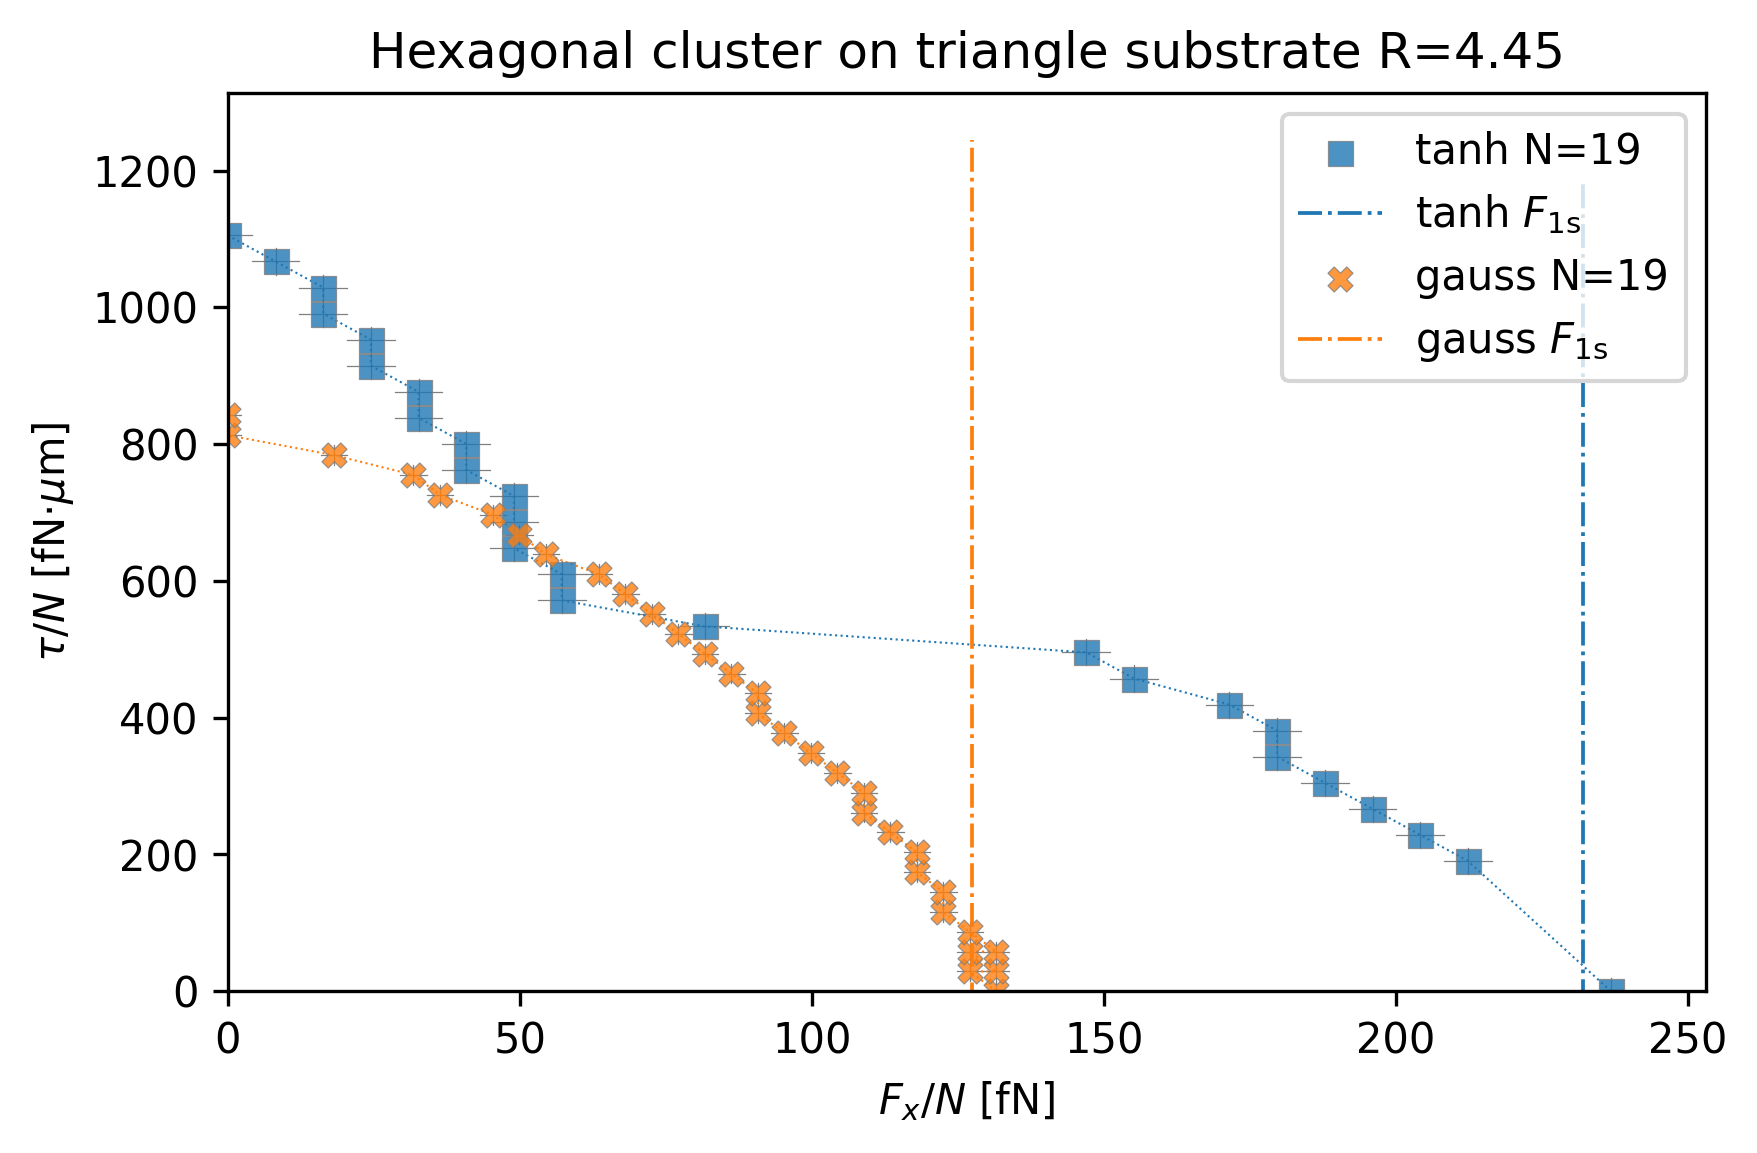

In [9]:
bdir = 'comm-tanh/'
i = 0 
N_list = [19]
c_lab = 'tanh'
for N in N_list:
    with open(bdir+'info-driver-N_%i.json' % N, 'r') as inj:
        inputs = json.load(inj)              
        
    rmob0, tmob0 = inputs['rmob0'], inputs['tmob0']   
    # Fractions to consider cluster roto/trasl depinned
    rmob_frac, tmob_frac = inputs['rmob_frac'], inputs['tmob_frac']
    Tau_range, F_range = npa(inputs['Tau_range']), npa(inputs['F_range'])
    dTau, dF = Tau_range[1]-Tau_range[0], F_range[1]-F_range[0]
    
    # Load F-Tau simulation grid from analysis
    TF_grid = np.loadtxt(bdir+'TauF_grid-N_%i.npdat' % N)
    mask = TF_grid > 0 # -1=not computed, 0=pinned, 1=roto, dep 2=trasl dep, 3=full dep

    # Plot grid
    ff, tt = np.meshgrid(F_range, Tau_range)  
    sc = plt.scatter(ff[mask].T/N, tt[mask].T/N, 
                     c=color_list[i], marker=symbol_list[i], alpha=0.8, ec='gray', lw=0.3,
                     label=c_lab+' N=%i' % N, zorder=2); 
    plt.plot(ff[mask].T/N, tt[mask].T/N, ':', color=color_list[i], lw=0.5, zorder=1); 
    # Errorbars
    p = np.zeros((len(tt[mask]), 2))
    l = 0
    for f, t in zip(ff[mask].T, tt[mask].T):
            p[l] = f, t
            l+=1
    errbar_pt={'color': 'gray', 'lw': 0.3, 'markersize': 1, 'zorder': 0}
    plt.plot([(p[:,0]-dF/2)/N, (p[:,0]+dF/2)/N], [(p[:,1])/N, (p[:,1])/N], '-', **errbar_pt)
    plt.plot([(p[:,0])/N, (p[:,0])/N], [(p[:,1]-dTau/2)/N, (p[:,1]+dTau/2)/N], '-', **errbar_pt)        
F1s = 232.0266 # Tanh a=0.6 b=2 eps=105
plt.vlines([F1s], *plt.ylim(), label=c_lab+r' $F_\mathrm{1s}$', lw=0.9, color=color_list[i], ls='-.')

i += 1
bdir = './comm-gauss/'
c_lab = 'gauss'
for N in N_list:
    with open(bdir+'info-driver-N_%i.json' % N, 'r') as inj:
        inputs = json.load(inj)              
        
    rmob0, tmob0 = inputs['rmob0'], inputs['tmob0']   
    # Fractions to consider cluster roto/trasl depinned
    rmob_frac, tmob_frac = inputs['rmob_frac'], inputs['tmob_frac']
    Tau_range, F_range = npa(inputs['Tau_range']), npa(inputs['F_range'])
    dTau, dF = Tau_range[1]-Tau_range[0], F_range[1]-F_range[0]
    
    # Load F-Tau simulation grid from analysis
    TF_grid = np.loadtxt(bdir+'TauF_grid-N_%i.npdat' % N)
    mask = TF_grid > 0 # -1=not computed, 0=pinned, 1=roto, dep 2=trasl dep, 3=full dep

    # Plot grid
    ff, tt = np.meshgrid(F_range, Tau_range)  
    sc = plt.scatter(ff[mask].T/N, tt[mask].T/N, 
                     c=color_list[i], marker=symbol_list[i], alpha=0.8, ec='gray', lw=0.3,
                     label=c_lab+' N=%i' % N, zorder=2); 
    plt.plot(ff[mask].T/N, tt[mask].T/N, ':', color=color_list[i], lw=0.5, zorder=1); 
    # Errorbars
    p = np.zeros((len(tt[mask]), 2))
    l = 0
    for f, t in zip(ff[mask].T, tt[mask].T):
            p[l] = f, t
            l+=1
    errbar_pt={'color': 'gray', 'lw': 0.3, 'markersize': 1, 'zorder': 0}
    plt.plot([(p[:,0]-dF/2)/N, (p[:,0]+dF/2)/N], [(p[:,1])/N, (p[:,1])/N], '-', **errbar_pt)
    plt.plot([(p[:,0])/N, (p[:,0])/N], [(p[:,1]-dTau/2)/N, (p[:,1]+dTau/2)/N], '-', **errbar_pt)        
# Markings for single colloid static friction force and critical torque scaling
F1s = 127.37 # Gauss sigma=0.6 eps=105
plt.vlines([F1s], *plt.ylim(), label=c_lab+r' $F_\mathrm{1s}$', lw=0.9, color=color_list[i], ls='-.')

# Plot comsetic
plt.title("Hexagonal cluster on %s substrate R=%3g" % (inputs['MD_inputs']['sub_symm'], 
                                                       inputs['MD_inputs']['R']))
# Axis
plt.xlim(0, plt.xlim()[1])
plt.ylim(0, plt.ylim()[1])
plt.ylabel(r'$\tau/N$ [fN$\cdot \mu$m]'); 
plt.xlabel(r'$F_x/N$ [fN]'); 
plt.legend()
# Layout and resolution
plt.tight_layout()
plt.gcf().set_dpi(300)

# Save and plot
plt.savefig("dep_diag-compare.pdf")
plt.show()

## Square substrate 5.00

### Case $F_\parallel$

T 8 F 16
(8, 16)


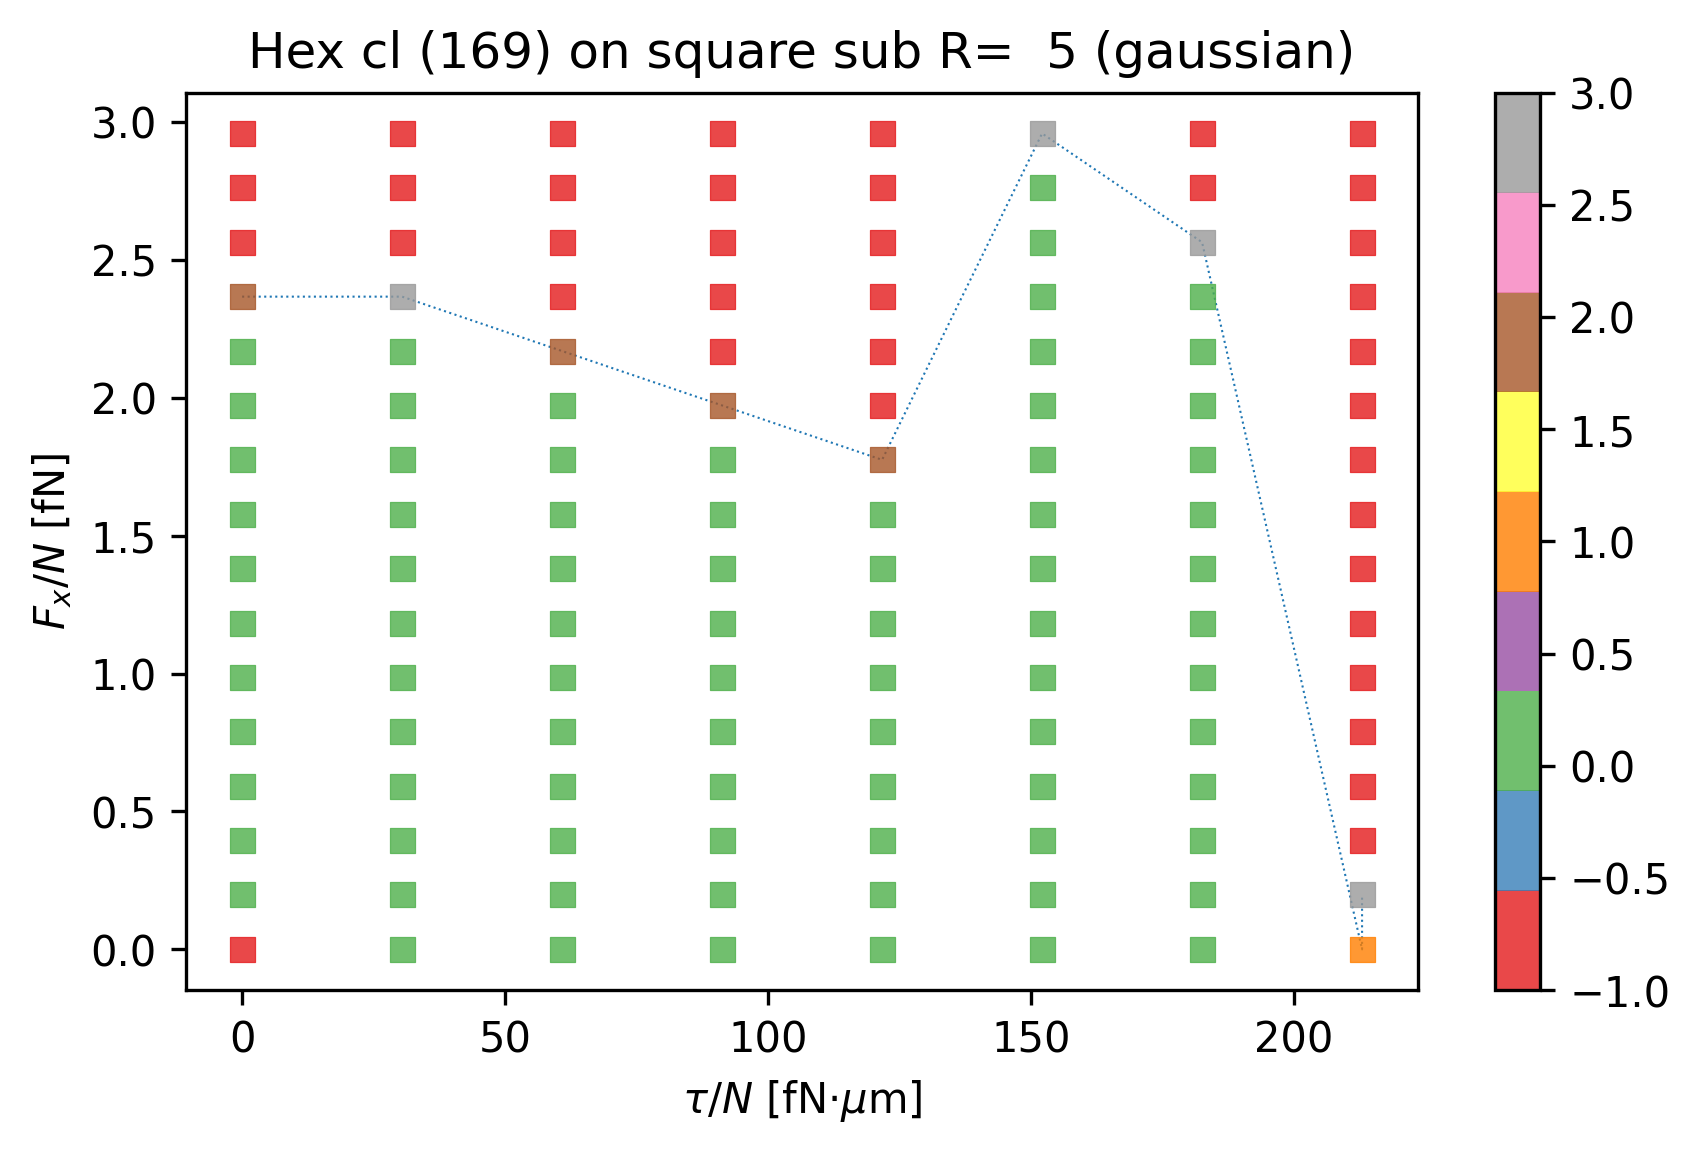

In [71]:
# bdir = './sq_5.00-th_3.4-gauss/'
bdir = './sq_5.00-tho_-3.4-thd_26.6-gauss/'
# bdir = './comm-gauss/'
# bdir = './sq_5.00-tho_-3.4-thd_116.6-gauss/'
i = 0 
# N_list = [19] #, 37, 91, 271, 1141, 3571]
N_list = [169]
for N in N_list:
    with open(bdir+'info-driver-N_%i.json' % N, 'r') as inj:
        inputs = json.load(inj)              
        
    rmob0, tmob0 = inputs['rmob0'], inputs['tmob0']   
    # Fractions to consider cluster roto/trasl depinned
    rmob_frac, tmob_frac = inputs['rmob_frac'], inputs['tmob_frac']
    Tau_range, F_range = npa(inputs['Tau_range']), npa(inputs['F_range'])
    print("T", len(Tau_range), "F", len(F_range))
    # Load F-Tau simulation grid from analysis
    TF_grid = np.loadtxt(bdir+'TauF_grid-N_%i.npdat' % N)
    mask = TF_grid > 0 # -1=not computed, 0=pinned, 1=roto, dep 2=trasl dep, 3=full dep
    
    # Plot grid
    ff, tt = np.meshgrid(F_range, Tau_range)
    print(ff.shape)
#     N = 1
    sc = plt.scatter(tt/N, ff/N, 
                    c=TF_grid, marker=symbol_list[i], alpha=0.8, cmap='Set1', lw=0.3,
                     label='N=%i' % N, zorder=2); 
    plt.plot(tt[mask]/N, ff[mask]/N, ':', color=color_list[i], lw=0.5, zorder=1); 
    plt.colorbar(sc)
    i += 1

# Plot comsetic
plt.title("Hex cl (%i) on %s sub R=%3g (%s)" % (N, inputs['MD_inputs']['sub_symm'], 
                                                inputs['MD_inputs']['R'], 
                                                inputs['MD_inputs']['well_shape']))
# Axis
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\tau/N$ [fN$\cdot \mu$m]'); 
plt.ylabel(r'$F_x/N$ [fN]'); 
# plt.legend()
# Layout and resolution
plt.tight_layout()
plt.gcf().set_dpi(300)

# Save and plot
# plt.savefig(bdir+"dep_diag-combo.pdf")
plt.show()

### Case $F_\perp$

T 8 F 16
(8, 16)


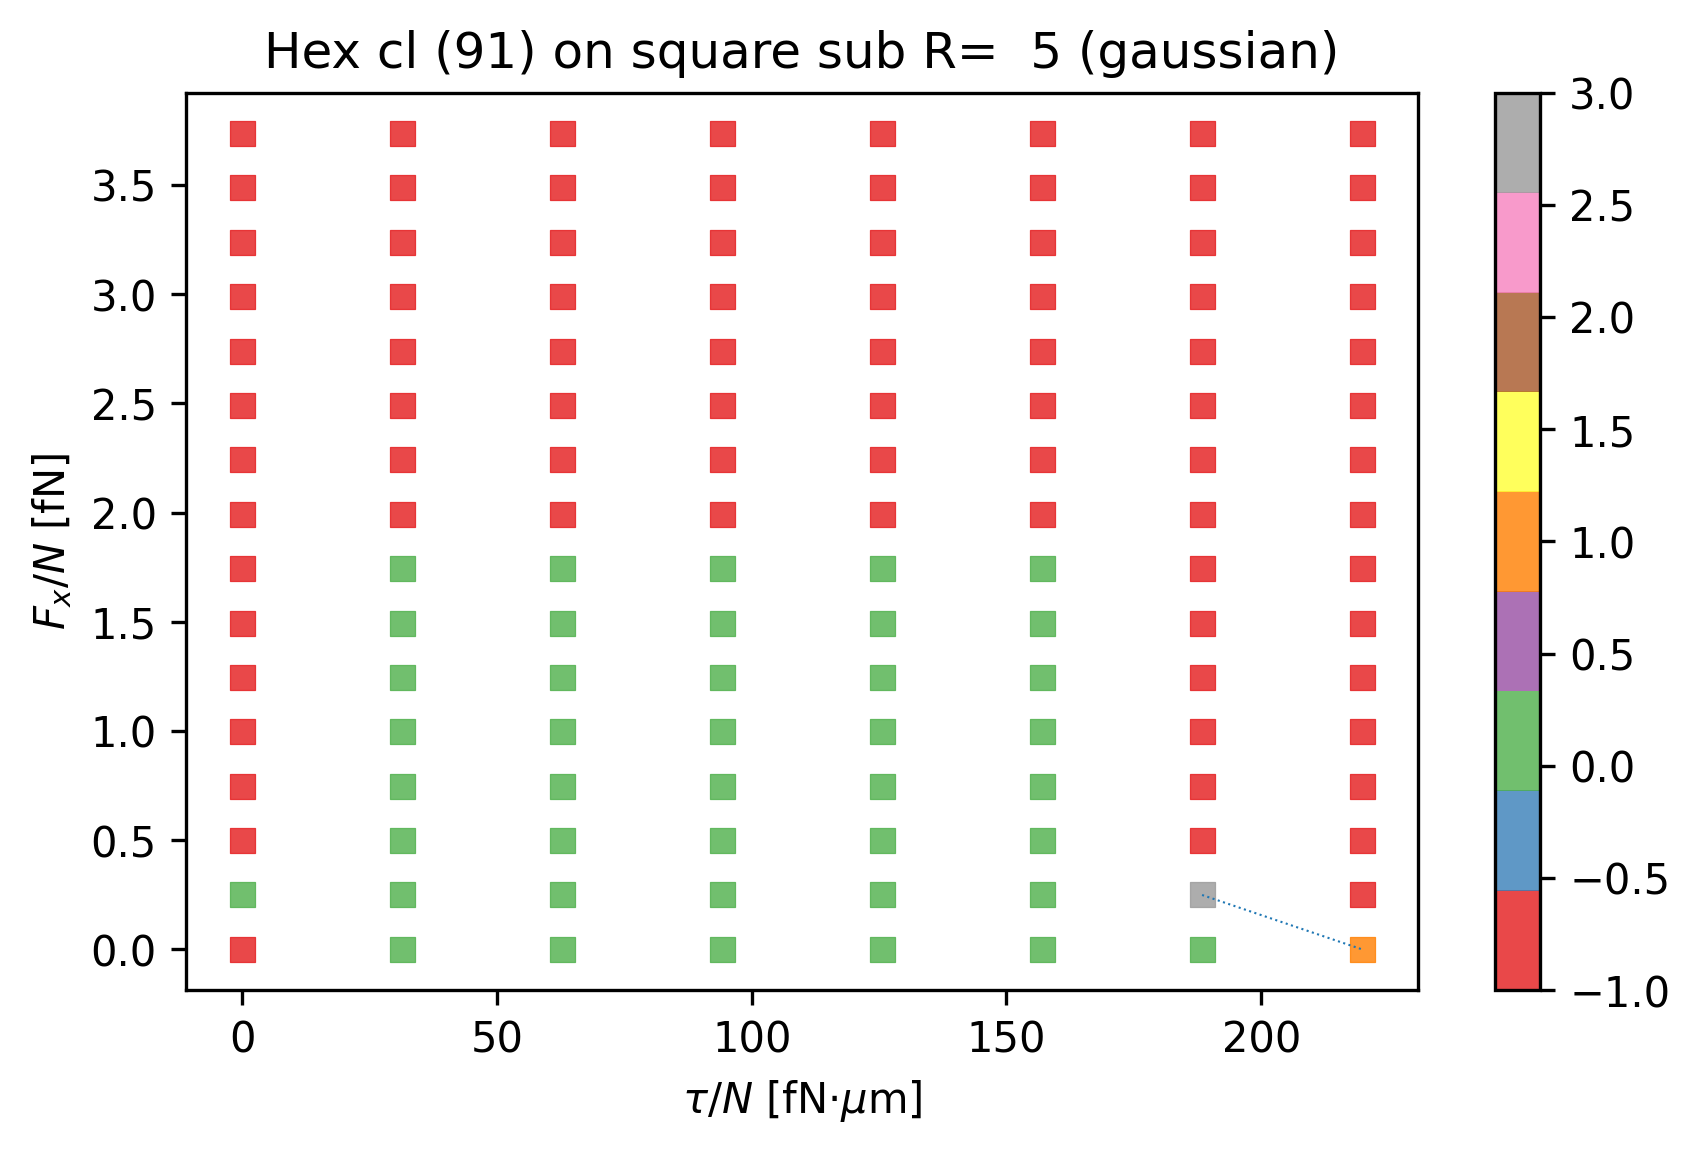

In [90]:
# bdir = './sq_5.00-th_3.4-gauss/'
# bdir = './sq_5.00-tho_-3.4-thd_26.6-gauss/'
# bdir = './comm-gauss/'
bdir = './sq_5.00-tho_-3.4-thd_116.6-gauss/'
bdir = './'
i = 0 
# N_list = [19] #, 37, 91, 271, 1141, 3571]
N_list = [91]
for N in N_list:
    with open(bdir+'info-driver-N_%i.json' % N, 'r') as inj:
        inputs = json.load(inj)              
        
    rmob0, tmob0 = inputs['rmob0'], inputs['tmob0']   
    # Fractions to consider cluster roto/trasl depinned
    rmob_frac, tmob_frac = inputs['rmob_frac'], inputs['tmob_frac']
    Tau_range, F_range = npa(inputs['Tau_range']), npa(inputs['F_range'])
    print("T", len(Tau_range), "F", len(F_range))
    # Load F-Tau simulation grid from analysis
    TF_grid = np.loadtxt(bdir+'TauF_grid-N_%i.npdat' % N)
    mask = TF_grid > 0 # -1=not computed, 0=pinned, 1=roto, dep 2=trasl dep, 3=full dep
    
    # Plot grid
    ff, tt = np.meshgrid(F_range, Tau_range)
    print(ff.shape)
#     N = 1
    sc = plt.scatter(tt/N, ff/N, 
                    c=TF_grid, marker=symbol_list[i], alpha=0.8, cmap='Set1', lw=0.3,
                     label='N=%i' % N, zorder=2); 
    plt.plot(tt[mask]/N, ff[mask]/N, ':', color=color_list[i], lw=0.5, zorder=2); 
    plt.colorbar(sc)
    i += 1

# Plot comsetic
plt.title("Hex cl (%i) on %s sub R=%3g (%s)" % (N, inputs['MD_inputs']['sub_symm'], 
                                                inputs['MD_inputs']['R'], 
                                                inputs['MD_inputs']['well_shape']))
# Axis
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\tau/N$ [fN$\cdot \mu$m]'); 
plt.ylabel(r'$F_x/N$ [fN]'); 
# plt.legend()
# Layout and resolution
plt.tight_layout()
plt.gcf().set_dpi(300)

# Save and plot
# plt.savefig(bdir+"dep_diag-combo.pdf")
plt.show()

## Compare differente directions

./sq_5.00-tho_-3.4-thd_116.6-gauss/
T 8 F 16
(8, 16)
./sq_5.00-tho_-3.4-thd_26.6-gauss/
T 8 F 16
(8, 16)


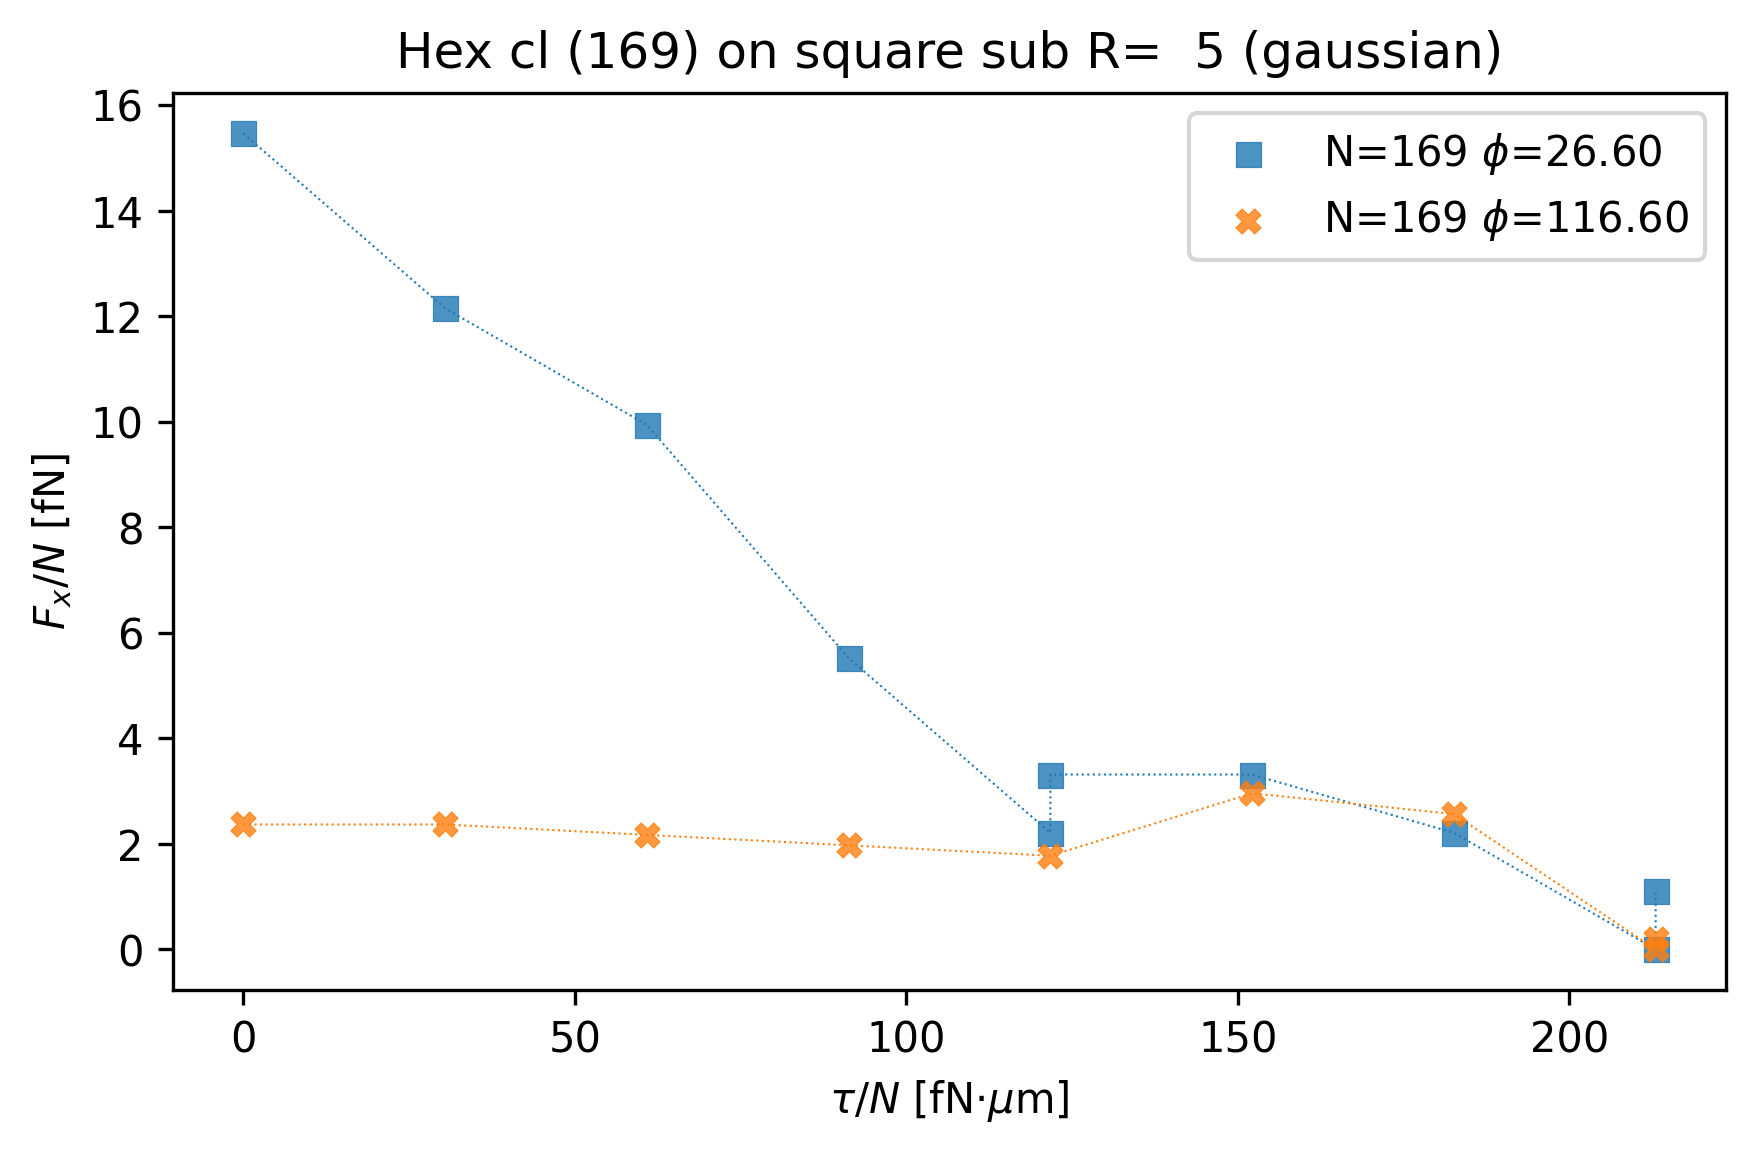

In [88]:
i = 0 
bdir_l = ['./sq_5.00-tho_-3.4-thd_116.6-gauss/', './sq_5.00-tho_-3.4-thd_26.6-gauss/']
phi_l = [26.6, 116.6]
for  bdir, phi in zip(bdir_l, phi_l):
    # N_list = [19] #, 37, 91, 271, 1141, 3571]
    N_list = [169]
    print(bdir)
    for N in N_list:
        with open(bdir+'info-driver-N_%i.json' % N, 'r') as inj:
            inputs = json.load(inj)              

        rmob0, tmob0 = inputs['rmob0'], inputs['tmob0']   
        # Fractions to consider cluster roto/trasl depinned
        rmob_frac, tmob_frac = inputs['rmob_frac'], inputs['tmob_frac']
        Tau_range, F_range = npa(inputs['Tau_range']), npa(inputs['F_range'])
        print("T", len(Tau_range), "F", len(F_range))
        # Load F-Tau simulation grid from analysis
        TF_grid = np.loadtxt(bdir+'TauF_grid-N_%i.npdat' % N)
        mask = TF_grid > 0 # -1=not computed, 0=pinned, 1=roto, dep 2=trasl dep, 3=full dep

        # Plot grid
        ff, tt = np.meshgrid(F_range, Tau_range)
        print(ff.shape)
#         N = 1
        sc = plt.scatter(tt[mask]/N, ff[mask]/N, 
                         marker=symbol_list[i], alpha=0.8, cmap='Set1', lw=0.3,
                         label=r'N=%i $\phi$=%.2f' % (N, phi), zorder=2); 
        plt.plot(tt[mask]/N, ff[mask]/N, ':', color=color_list[i], lw=0.5, zorder=1); 

        i += 1

# Plot comsetic
plt.legend()
plt.title("Hex cl (%i) on %s sub R=%3g (%s)" % (N, inputs['MD_inputs']['sub_symm'], 
                                                inputs['MD_inputs']['R'], 
                                                inputs['MD_inputs']['well_shape']))
# Axis
#plt.xscale('log')
#plt.yscale('log')
# plt.colorbar(sc)
plt.xlabel(r'$\tau/N$ [fN$\cdot \mu$m]'); 
plt.ylabel(r'$F_x/N$ [fN]'); 
# plt.legend()
# Layout and resolution
plt.tight_layout()
plt.gcf().set_dpi(300)

# Save and plot
# plt.savefig(bdir+"dep_diag-combo.pdf")
plt.show()

## Triangular substrate R=$\sqrt{7}/2 R_{cl}\approx$5.89